In [213]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

sns.set_style(style='darkgrid')

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [164]:
# import dataset

airbnb = pd.read_csv("D:/Projects/NYC python/nyc_airbnb.csv") 
airbnb.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [165]:
# describe the data stats

airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [166]:
#getting idea of how the data looks like

airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [167]:
# displaying null values

airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [168]:
#dropping irrelevant columns

airbnb.drop(['last_review', 'host_name', 'id'], axis = 1, inplace = True)

In [169]:
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [170]:
airbnb.fillna(value = {'reviews_per_month': 0}, inplace = True)

In [171]:
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [172]:
airbnb.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [173]:
#display unique airbnb room types

print(airbnb.room_type.unique())

# display unique airbnb neighborhood groups

print(airbnb.neighbourhood_group.unique())

# display unique airbnb neighborhoods

print(len(airbnb.neighbourhood.unique()))


['Private room' 'Entire home/apt' 'Shared room']
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
221


In [174]:
# value counts -> NA will be omitted
# by default series in ascending order

top_hosts = airbnb.host_id.value_counts().head(10)
top_hosts


219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [175]:
top_hosts_df = pd.DataFrame(top_hosts)
type(top_hosts_df)
top_hosts_df.reset_index(inplace=True)
top_hosts_df.rename(columns={'index': 'Host ID', 'host_id': 'P Count'}, inplace=True)

In [176]:
top_hosts_df

,Host ID,P Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


# Visualizations

[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

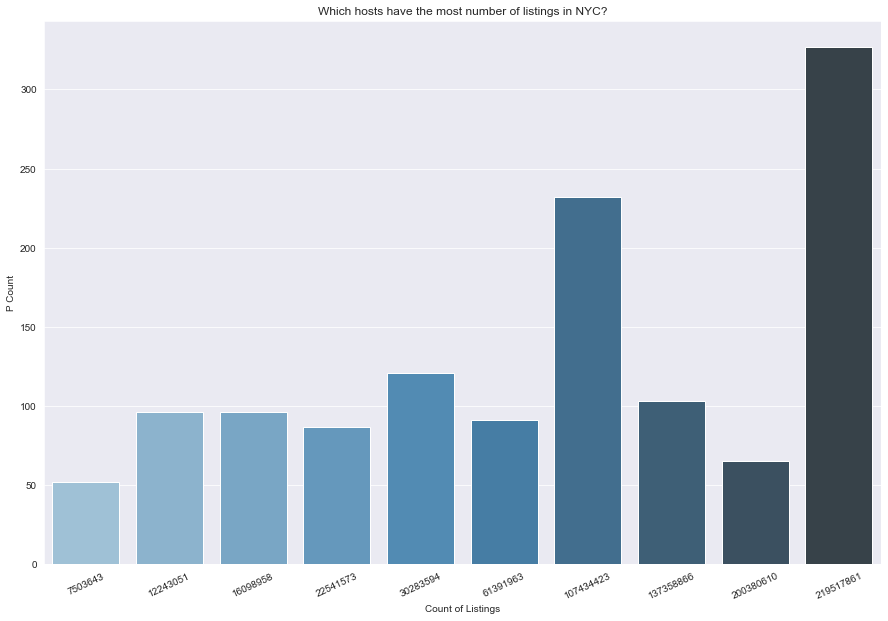

In [177]:
# bar plot of hosts and number of listings
plt.figure(figsize=(15,10)) 

bar_plot = sns.barplot(x = 'Host ID',
            y = 'P Count',
            data = top_hosts_df,
            palette = 'Blues_d',
            )

bar_plot.set_title('Which hosts have the most number of listings in NYC?')
bar_plot.set_xlabel('Count of Listings')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation = 25)

Text(0, 0.5, 'Price')

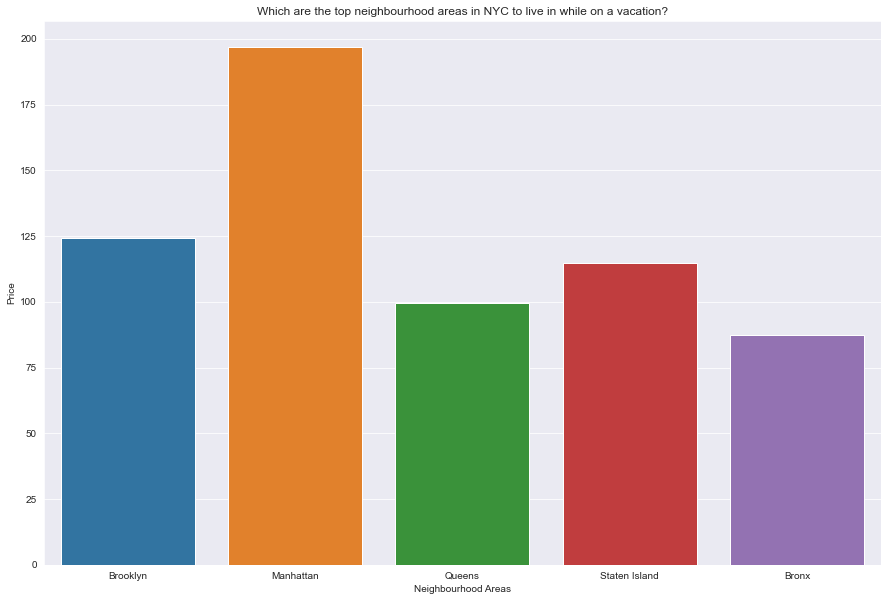

In [178]:
# bar plot of neighbourhood areas and their prices
plt.figure(figsize=(15,10)) 

bar_plot_neighbourhood_group = sns.barplot(x = 'neighbourhood_group',
            y = 'price',
            data = airbnb,
            palette = 'tab10',
            ci = None
            )

bar_plot_neighbourhood_group.set_title('Which are the top neighbourhood areas in NYC to live in while on a vacation?')
bar_plot_neighbourhood_group.set_xlabel('Neighbourhood Areas')
bar_plot_neighbourhood_group.set_ylabel('Price')

In [179]:
# brooklyn
group_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_group_1=group_1[['price']]

# manhattan
group_2=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_group_2=group_2[['price']]

# queens
group_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_group_3=group_3[['price']]

# staten island
group_4=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_group_4=group_4[['price']]

# bronx
group_5=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_group_5=group_5[['price']]

# putting all the prices' dfs in the list
price_list_by_n=[price_group_1, price_group_2, price_group_3, price_group_4, price_group_5]

In [180]:
price_distribution=[]

#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#creating a for loop to get statistics for price ranges and append it to empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    price_distribution.append(i)

#changing names of the price column to the area name for easier reading of the table    
price_distribution[0].rename(columns={'price':nei_list[0]}, inplace=True)
price_distribution[1].rename(columns={'price':nei_list[1]}, inplace=True)
price_distribution[2].rename(columns={'price':nei_list[2]}, inplace=True)
price_distribution[3].rename(columns={'price':nei_list[3]}, inplace=True)
price_distribution[4].rename(columns={'price':nei_list[4]}, inplace=True)

#finilizing our dataframe for final view    
stats_neighbourhood=price_distribution
stats_neighbourhood=[df.set_index('Stats') for df in stats_neighbourhood]
stats_neighbourhood=stats_neighbourhood[0].join(stats_neighbourhood[1:])
stats_neighbourhood

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'What is the distribution of prices for various neighbourhoods?')

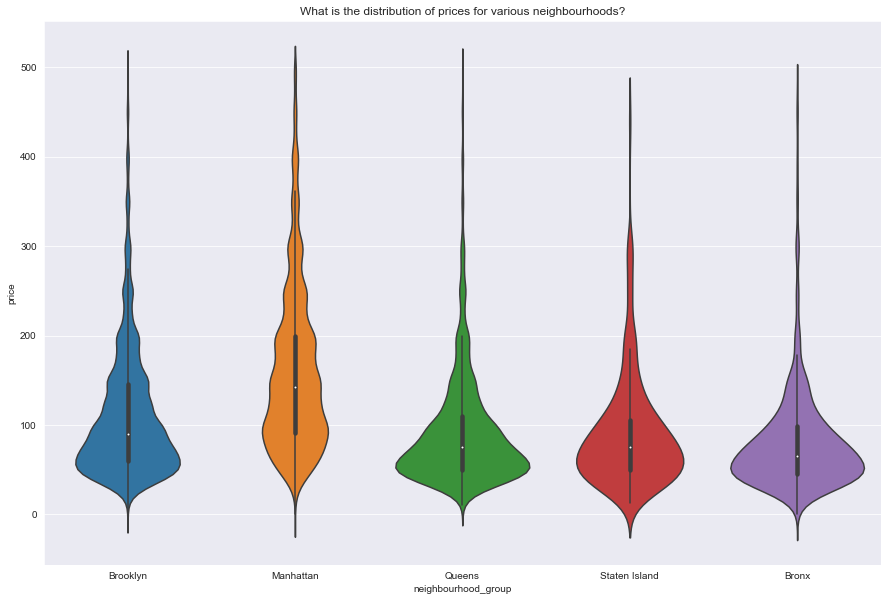

In [181]:
# violin plot for neighbourhood groups
plt.figure(figsize=(15,10)) 
new = airbnb[airbnb.price < 500]
violin_plot = sns.violinplot(x = 'neighbourhood_group',
                            y = 'price',
                            data = new
                            )    

violin_plot.set_title('What is the distribution of prices for various neighbourhoods?')

In [182]:
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

<Figure size 1440x1440 with 0 Axes>

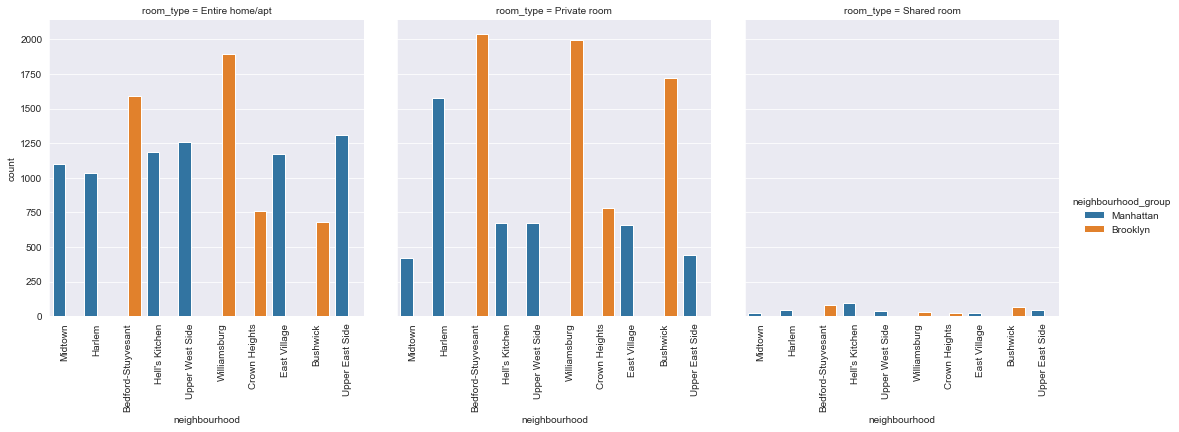

In [183]:
# neighbourhood barplots

neighbour_subset = airbnb.loc[airbnb.neighbourhood.isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

plt.figure(figsize=(20,20))

neighbour_barplot = sns.catplot(x = 'neighbourhood',
                                hue = 'neighbourhood_group',
                                col='room_type',
                                data = neighbour_subset,
                                kind = 'count')

neighbour_barplot.set_xticklabels(rotation=90)

In [184]:
# create word cloud

names = []
for name in airbnb.name:
    names.append(name)

def split_name(name):
    word = str(name).split()
    return word

words_in_name = []

for x in names:
    for word in split_name(x):
        word = word.lower()
        words_in_name.append(word)


words = ' '.join(map(str, words_in_name))

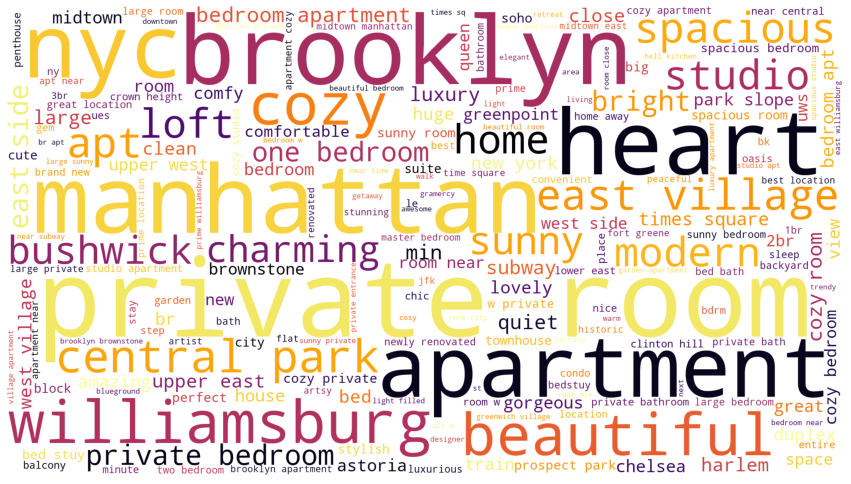

In [185]:
wc = WordCloud(
                background_color='white',
                stopwords = set(STOPWORDS),
                colormap = "inferno",
                collocations = True,
                width = 1921,
                height = 1080
                ).generate_from_text(words)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

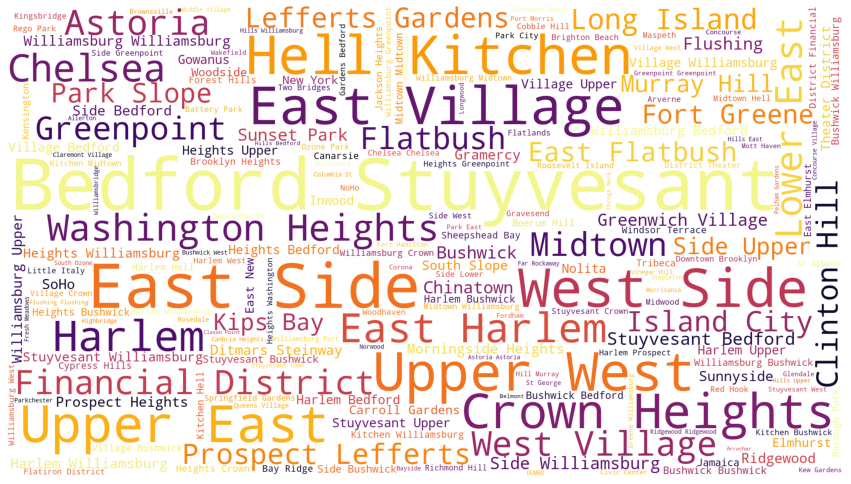

In [186]:
wc = WordCloud(
                background_color='white',
                stopwords = set(STOPWORDS),
                colormap = "inferno",
                collocations = True,
                width = 1921,
                height = 1080
                ).generate(" ".join(airbnb.neighbourhood))
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [187]:
_top_25_w=Counter(words_in_name).most_common()
_top_25_w=_top_25_w[0:25]

In [188]:
subset_top=pd.DataFrame(_top_25_w)
subset_top.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

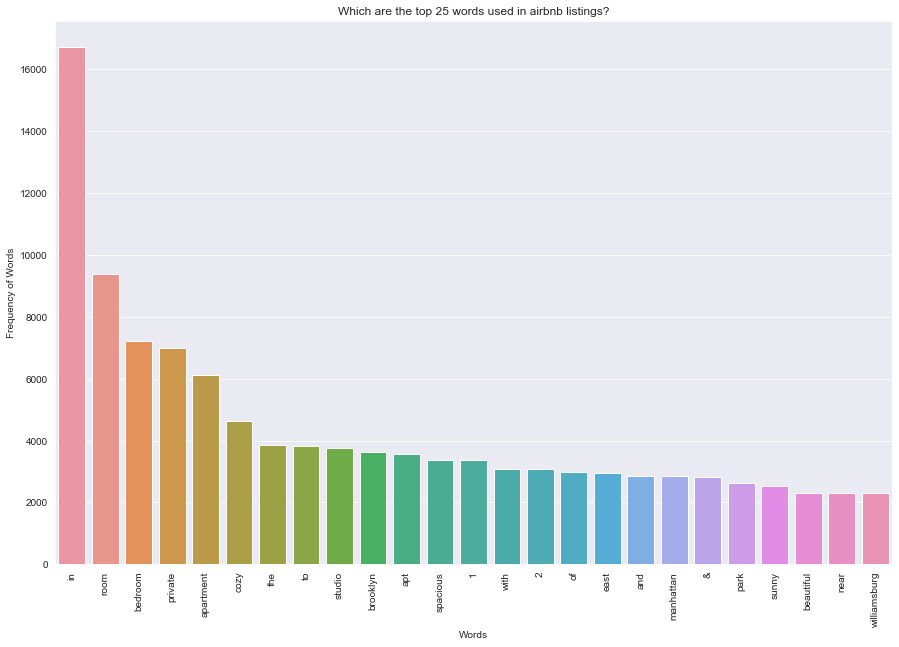

In [189]:
plt.figure(figsize=(15,10)) 


words_barplot = sns.barplot(x = 'Words',
                            y = 'Count',
                            data = subset_top)
words_barplot.set_ylabel("Frequency of Words")
words_barplot.set_title("Which are the top 25 words used in airbnb listings?")
words_barplot.set_xlabel("Words")
words_barplot.set_xticklabels(words_barplot.get_xticklabels(), rotation=90)

Text(0, 0.5, 'Count')

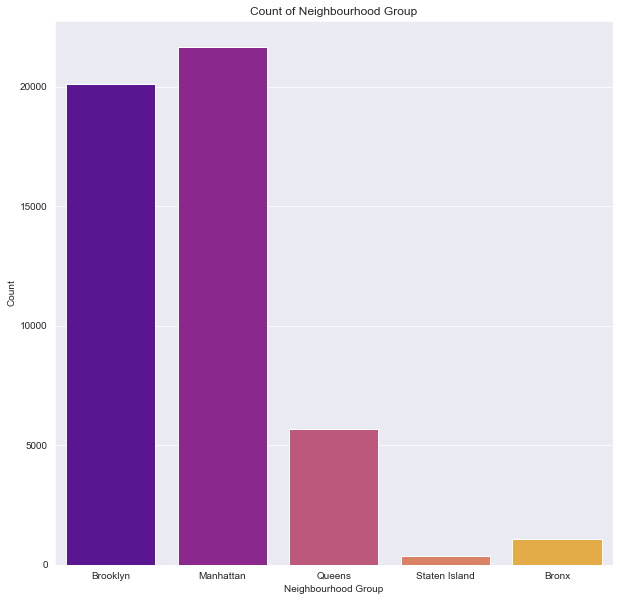

In [190]:
sns.countplot(x = 'neighbourhood_group',
                palette = 'plasma',
                data = airbnb)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title("Count of Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")

Text(0.5, 1.0, 'Type of Rooms available in listings')

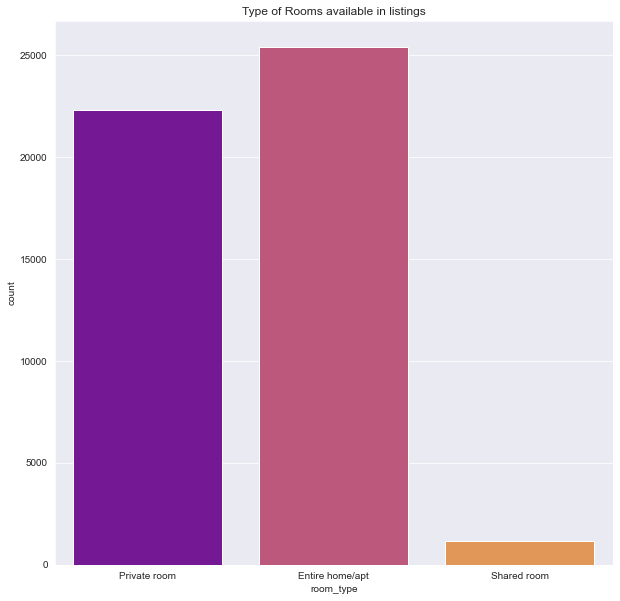

In [191]:
sns.countplot(x = 'room_type',
            data = airbnb,
            palette = "plasma")
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title("Type of Rooms available in listings")

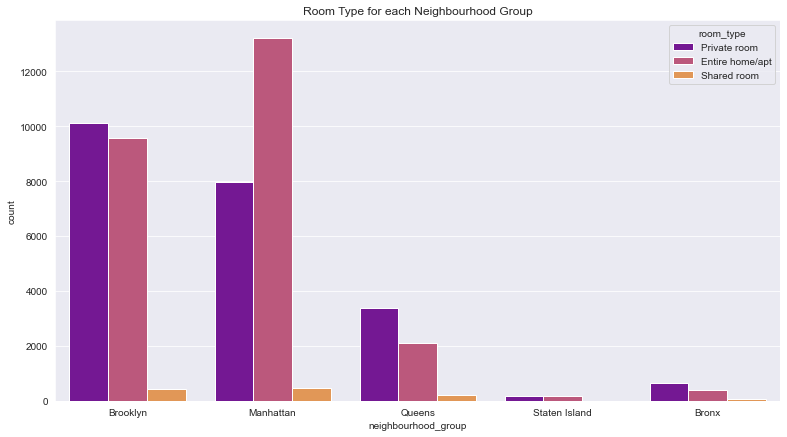

In [192]:
plt.figure(figsize=(13,7))
plt.title("Room Type for each Neighbourhood Group")
sns.countplot(airbnb.neighbourhood_group,
            hue=airbnb.room_type,
            palette="plasma")
            
plt.show()

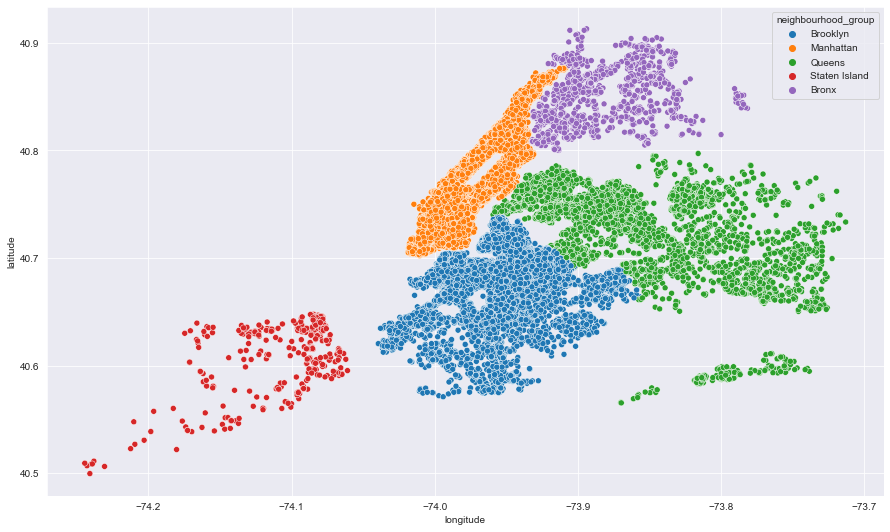

In [193]:
# neighbourhood group map

plt.figure(figsize = (15, 9))
sns.scatterplot(airbnb.longitude, airbnb.latitude,
                hue = airbnb.neighbourhood_group)
plt.ioff()

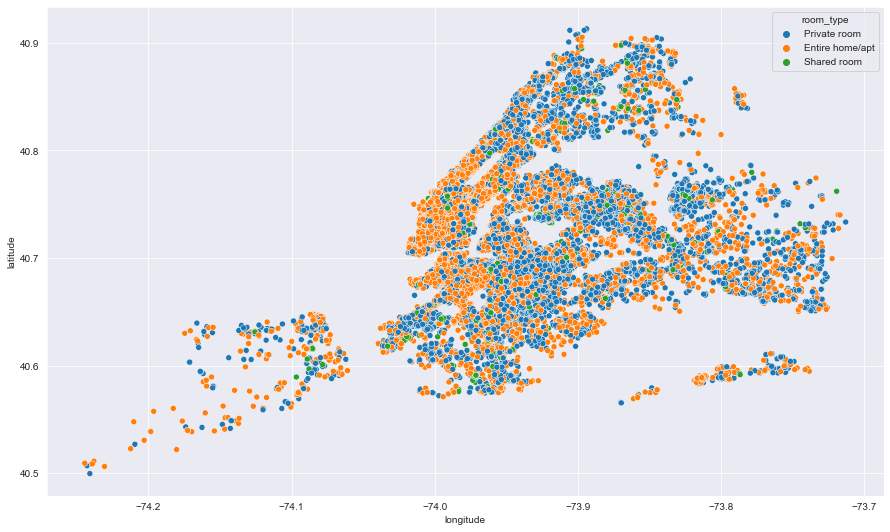

In [194]:
# room type map

plt.figure(figsize = (15, 9))
sns.scatterplot(airbnb.longitude, airbnb.latitude,
                hue = airbnb.room_type)
plt.ioff()

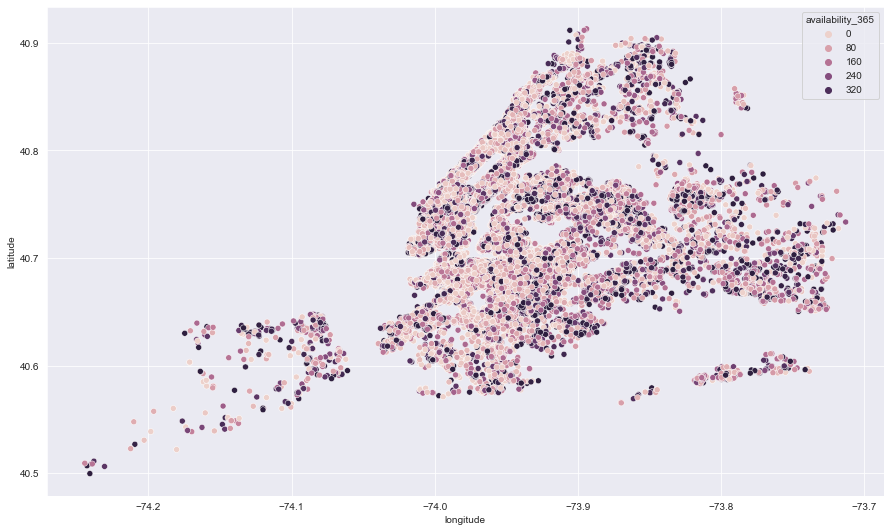

In [195]:
# availability of room map

plt.figure(figsize=(15,9))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

# Regression Analysis

Drop Columns

In [196]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [197]:
airbnb.drop(['name','host_id','latitude','longitude','number_of_reviews','reviews_per_month'], axis=1, inplace=True)

In [198]:
airbnb.head(5)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,2,355
2,Manhattan,Harlem,Private room,150,3,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,1,0


Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'calculated_host_listings_count', 'availability_365'],
      dtype='object')

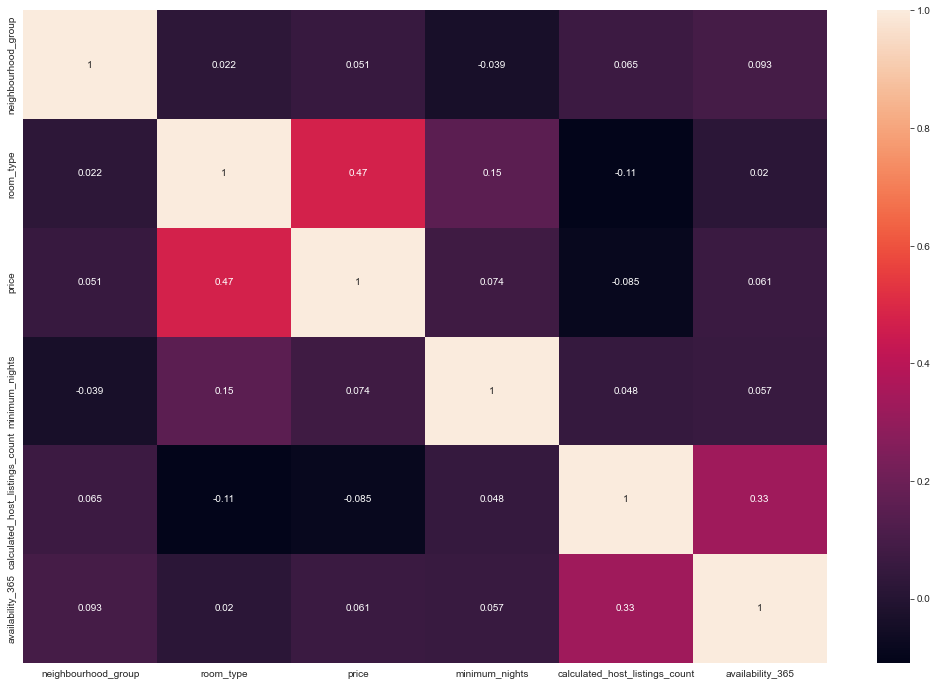

In [199]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

corr = airbnb_en.corr(method = 'kendall')
plt.figure(figsize = (18, 12))
sns.heatmap(corr, annot = True)
airbnb_en.columns

In [200]:
encode = preprocessing.LabelEncoder()

In [201]:
encode.fit(airbnb.neighbourhood_group)
airbnb.neighbourhood_group=encode.transform(airbnb.neighbourhood_group)

In [202]:
encode = preprocessing.LabelEncoder()
encode.fit(airbnb.neighbourhood)
airbnb.neighbourhood=encode.transform(airbnb.neighbourhood)
encode = preprocessing.LabelEncoder()
encode.fit(airbnb.room_type)
airbnb.room_type=encode.transform(airbnb.room_type)
airbnb.sort_values(by='price',ascending=True,inplace=True)

In [221]:
l_reg = LinearRegression()
X = airbnb[['neighbourhood_group','neighbourhood','room_type','minimum_nights','calculated_host_listings_count','availability_365']]
y = airbnb['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
l_reg.fit(X_train,y_train)

LinearRegression()

In [237]:
predicts = l_reg.predict(X_test)
print("Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, predicts)))
print("R2 Score: ", r2_score(y_test,predicts))
print("Mean Absolute Error: ", mean_absolute_error(y_test,predicts))
# print("Mean Squareroot Error: ", mean_squared_error(y_test,predicts))

Mean Squared Error:  183.05969999342986
R2 Score:  0.0935098386477684
Mean Absolute Error:  74.07218757779107


In [223]:
lr_pred_df = pd.DataFrame({
    'actual_values': np.array(y_test).flatten(),
    'predicted_values': predicts.flatten()}).head(20)

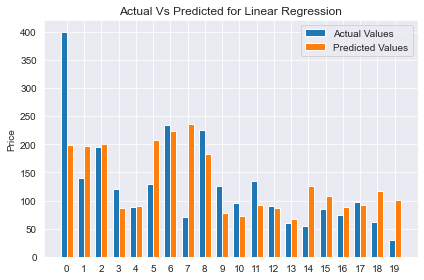

In [224]:

x = lr_pred_df.index
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_pred_df.actual_values, width, label='Actual Values')
rects2 = ax.bar(x + width/2, lr_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('Price')
ax.set_title('Actual Vs Predicted for Linear Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show()

In [225]:
import xgboost as xgb
from xgboost import XGBRegressor

In [228]:
model = xgb.XGBRegressor()

In [229]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [230]:
predictions = model.predict(X_test)

In [239]:
# print("Mean Squared Error: ", mean_squared_error(predictions, y_test))
print("Mean Squared Error: ", np.sqrt(mean_squared_error(predictions, y_test)))
print("R2 score: ", r2_score(y_test, predictions))

Mean Squared Error:  181.68259327656398
R2 score:  0.10709708104046489


In [246]:
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

algo=[GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor()]
score=[]
for a in algo:
    score.append(boost_models(a))

 #Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])

,Model,Score,MAE,RMSE
0,GradientBoostingRegressor,0.132,56.99,179.11
1,LGBMRegressor,0.162,54.83,176.04
2,XGBRFRegressor,0.114,58.92,180.95


In [247]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]
             }
                
grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = xg.XGBRFRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

#evaluate metrics
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 8, 'n_estimators': 45, 'reg_lambda': 0.2}


(0.1319357128971288, 57.444658264595496, 179.1377617349234)